# Generating Mel Spectrogram
In this file, we generate Mel Spectrogram images to use them with our CNN models.

We will be generating over 1000 images

In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
import IPython.display as ipd
import librosa
import librosa.display
import os
from pandas_profiling import ProfileReport
from PIL import Image

import warnings 
warnings.filterwarnings('ignore')
import seaborn as sns
sns.set()
from numpy import asarray


/Users/home/opt/anaconda3/lib/python3.8/site-packages/requests/__init__.py:89: RequestsDependencyWarning: urllib3 (1.26.9) or chardet (3.0.4) doesn't match a supported version!
  warnings.warn("urllib3 ({}) or chardet ({}) doesn't match a supported "


### Problem
We noticed that images provided to us had thick white border, which isn't good when we pass it through our CNN model, since white carries value of **255, 255, 255** in RGB, it'll mess with our model. We thought it would be best to generate new image without those thick borders.

You can see the difference between image provided in the dataset from Kaggle, [here](#Kaggle-Image), and image generate by us over [here](#Newly-Generated-Image).

#### Kaggle Image

PNG
(432, 288)
RGBA
(288, 432, 4)


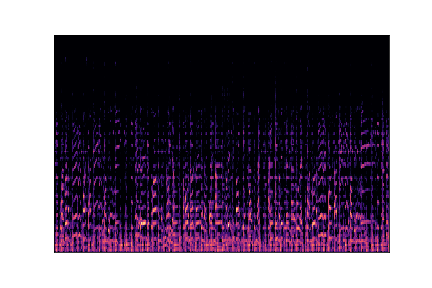

In [7]:
image = Image.open('../data/images_original/blues/blues00000.png')
  
# summarize some details about the image
print(image.format)
print(image.size)
print(image.mode)
print(asarray(image).shape)
image

#### Newly Generated Image

PNG
(334, 217)
RGBA
(217, 334, 4)


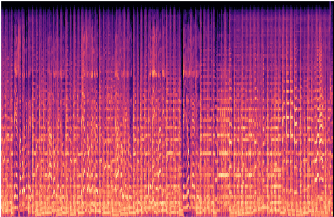

In [8]:
image_gen = Image.open('../data/images_gen/blues/blues00002.png')
  
# summarize some details about the image
print(image_gen.format)
print(image_gen.size)
print(image_gen.mode)
print(asarray(image_gen).shape)
image_gen


In [ ]:
%%time

# this code goes through all the genres, and their respective audio files, create mel spectrogram, 
# and saves it in the images_gen folder with each genre having its oown folder

# careful if running since there are 1000 audio files, 1000 images will be genrated, which can be time consuming
# since going through classical and blues genre took us about 1hr and 8min, and that only generatted 200 images.


genres = [
    'classical', 'blues',
    'country', 'disco', 'hiphop', 
    'jazz', 'metal', 'pop',
    'reggae', 'rock'
]

for i in tqdm(genres):
    print(i)
    
    isExist = os.path.exists(f'../data/images_gen/{i}')
    if not isExist:
        os.makedirs(f'../data/images_gen/{i}')

    for j in tqdm(sorted(os.listdir(f'../data/genres_original/{i}'))):
        filename = f'../data/genres_original/{i}/{j}'
        try:
            data, sr = librosa.load(filename)
            #             print(filename)
            mel = librosa.feature.melspectrogram(y=data, sr=sr)
            S_dB = librosa.power_to_db(mel, ref=np.max)
            img = librosa.display.specshow(S_dB, sr=sr, fmax=8000)

            plt.savefig(
                f'../data/images_gen/{i}/{i+filename.split(".")[-2]}.png',
                bbox_inches='tight',
                pad_inches=0)

        except:
            pass